In [18]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


In [21]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,3,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,2,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,1,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,3,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,3,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,3,1


In [23]:
features= np.array(data.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [24]:
labels= data.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [25]:
data.loc[data["trestbps"] < 100, "trestbps"] = 100
data.loc[data["trestbps"] > 170, "trestbps"] = 170

data.loc[data["chol"] < 100, "chol"] = 100
data.loc[data["chol"] > 320, "chol"] = 320

data.loc[data["thalach"] < 60, "thalachthalach"] = 60
data.loc[data["thalach"] > 202, "thalachthalach"] = 202

data.loc[data["oldpeak"] < 0, "oldpeak"] = 0
data.loc[data["oldpeak"] > 2.5, "oldpeak"] = 2.5

In [26]:
data = pd.get_dummies(data, columns=["sex", "cp", "restecg", "exang", "slope"], drop_first=True)

In [27]:
x = data.drop("target", axis=1)
y = data["target"]
#30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

In [28]:
model = LGBMClassifier().fit(x_train, y_train)
train_acc = model.score(x_train, y_train)
    
y_pred = model.predict(x)


In [29]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [30]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna


In [31]:
x1_train, x1_test, y1_train, y1_test = train_test_split(features, y_pred, test_size=0.3, random_state=0, shuffle=True)

In [32]:
model =  XGBClassifier().fit(x1_train, y1_train)
train_acc = model.score(x1_train, y1_train)
    
y1_pred = model.predict(features)
#test_acc = accuracy_score(y_test, y_pred)

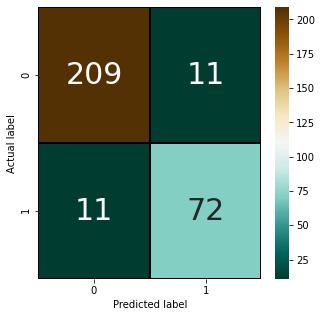

In [33]:


from sklearn.metrics import confusion_matrix
CM = confusion_matrix(labels, y1_pred)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=1,cmap='BrBG_r',linecolor="black",fmt=".0f",ax=ax,annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
TP=CM[0][0]
TN=CM[1][1]
FN=CM[1][0]
FP=CM[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.9273927392739274
Sensitivity for the hybrid model: 0.95
Specificity for the hybrid model: 0.8674698795180723
Precision for the hybrid model: 0.95
